In [7]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_excel(r"F:\Oasis\Data_file.xlsx")

In [9]:
data

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [68]:
data1=data.rename(columns={"City type":"City_type","Previous CTC":"Previous_CTC","Previous job changes":"Previous_job_changes","Graduation marks":"Graduation_marks","Exp (Months)":"Exp_Months"})

In [69]:
data1

,S.No.,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [70]:
data1.isnull().sum()

S.No.                   0
College                 0
Role                    0
City_type               0
Previous_CTC            0
Previous_job_changes    0
Graduation_marks        0
Exp_Months              0
CTC                     0
dtype: int64

In [71]:
data1.dtypes

S.No.                     int64
College                  object
Role                     object
City_type                object
Previous_CTC              int64
Previous_job_changes      int64
Graduation_marks          int64
Exp_Months                int64
CTC                     float64
dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
data1.College=le.fit_transform(data1.College)
data1.Role=le.fit_transform(data1.Role)
data1.City_type=le.fit_transform(data1.City_type)

In [74]:
data1.dtypes

S.No.                     int64
College                   int32
Role                      int32
City_type                 int32
Previous_CTC              int64
Previous_job_changes      int64
Graduation_marks          int64
Exp_Months                int64
CTC                     float64
dtype: object

In [75]:
x=data1.corr()
x

,S.No.,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
S.No.,1.000000,0.009506,0.005217,-0.003704,-0.014298,0.005475,0.000593,-0.031467,-0.022586
College,0.009506,1.000000,-0.001472,0.002384,-0.016259,-0.050243,-0.024994,-0.006760,-0.179152
Role,0.005217,-0.001472,1.000000,-0.076185,0.021208,-0.013131,0.014541,-0.025019,0.625435
City_type,-0.003704,0.002384,-0.076185,1.000000,-0.036956,0.001568,-0.018550,0.020856,-0.211258
Previous_CTC,-0.014298,-0.016259,0.021208,-0.036956,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous_job_changes,0.005475,-0.050243,-0.013131,0.001568,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation_marks,0.000593,-0.024994,0.014541,-0.018550,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp_Months,-0.031467,-0.006760,-0.025019,0.020856,0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,-0.022586,-0.179152,0.625435,-0.211258,0.270260,0.007518,-0.017557,0.301569,1.000000


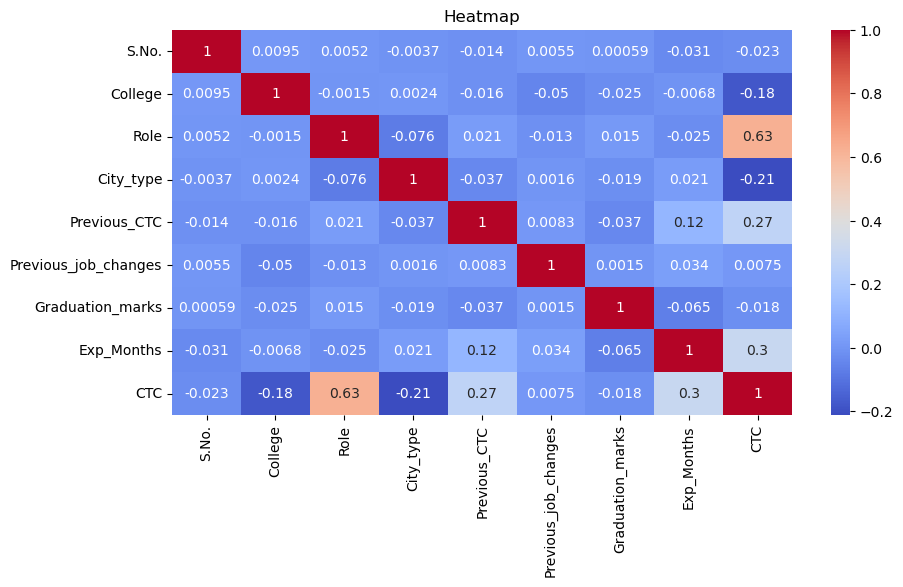

In [76]:
plt.figure(figsize=(10,5))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

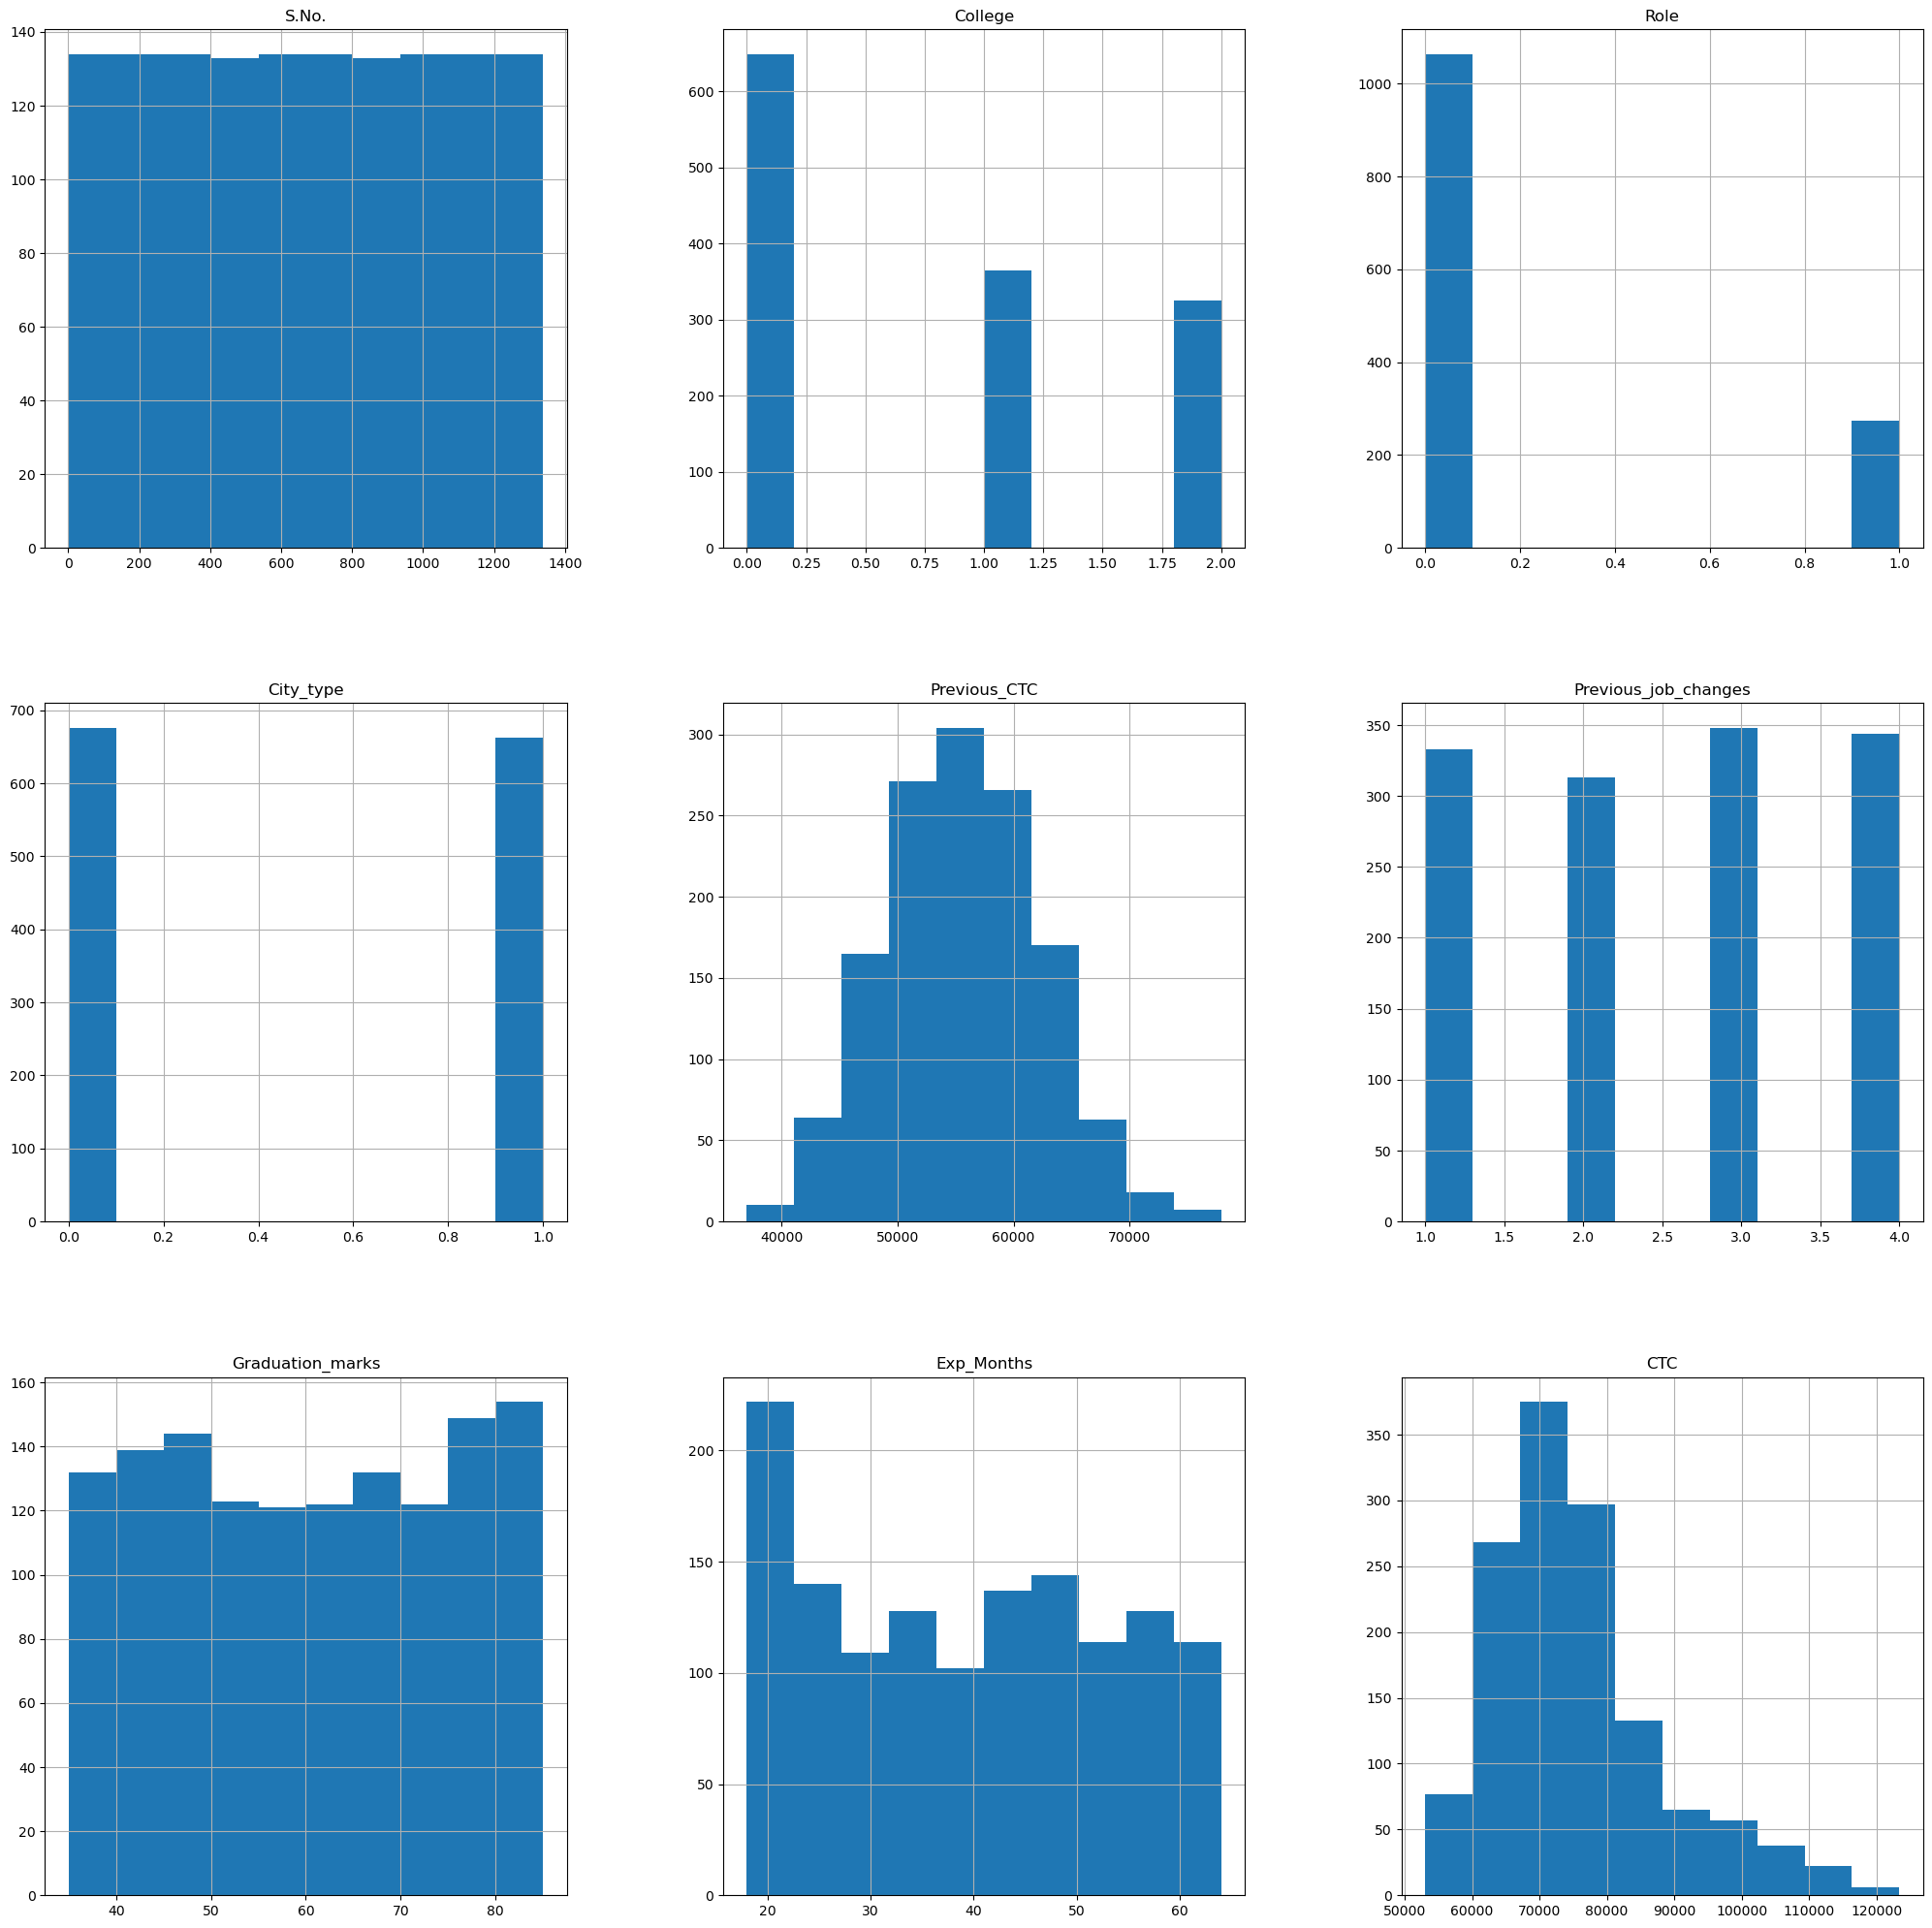

In [77]:
data1.hist(figsize=(25,25))
plt.show()

<AxesSubplot:>

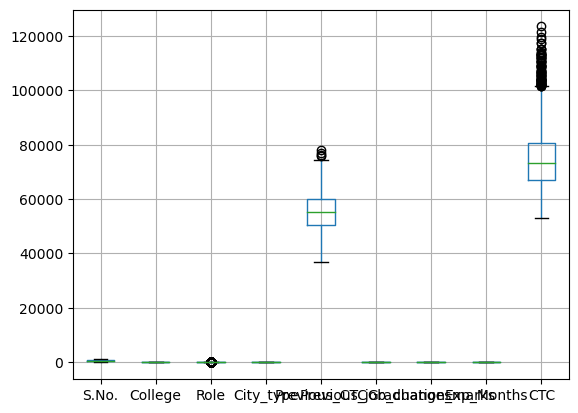

In [78]:
data1.boxplot()

<AxesSubplot:ylabel='Previous_CTC'>

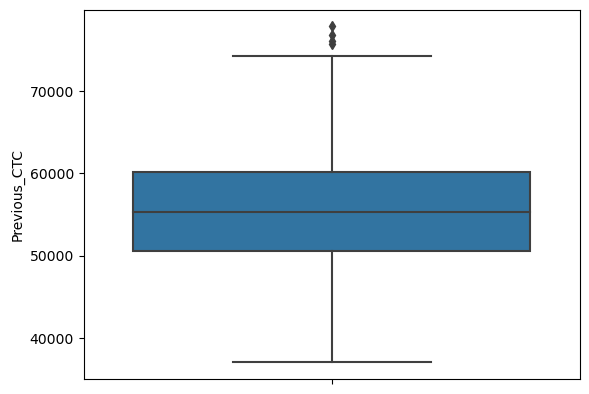

In [79]:
sns.boxplot(data=data1,y="Previous_CTC")

In [80]:
data1["Previous_CTC"].describe()

count     1338.000000
mean     55581.762332
std       6685.600553
min      36990.000000
25%      50547.000000
50%      55293.500000
75%      60150.500000
max      77911.000000
Name: Previous_CTC, dtype: float64

In [81]:
iqr=data1.Previous_CTC.quantile(0.75)-data1.Previous_CTC.quantile(0.25)
iqr

9603.5

In [82]:
lb=data1["Previous_CTC"].quantile(0.25)-(iqr*3)
ub=data1["Previous_CTC"].quantile(0.75)+(iqr*3)
print(lb,ub)

21736.5 88961.0


In [83]:
data1.loc[data1["Previous_CTC"]>88961.0,"Previous_CTC"]=88961.0

<AxesSubplot:xlabel='Exp_Months', ylabel='Density'>

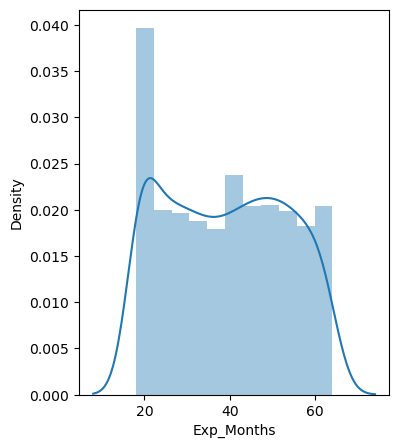

In [85]:
#CoapplicantIncome
fig=plt.figure(figsize=(4,5))
sns.distplot(data1.Exp_Months)

# Model

In [25]:
data1_x=data1.iloc[:,0:8]
data1_y=data1.iloc[:,-1]

In [28]:
import sklearn
from sklearn.model_selection import train_test_split

In [29]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(data1_x,data1_y,test_size=0.2,random_state=101)

In [30]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [31]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [32]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [33]:
lin_p=lin.predict(b_x_test)
lin_p

array([ 79880.02836134,  64983.21738742,  74930.46402138,  86196.58643986,
        72989.42958856,  66497.7970862 ,  78509.16779819,  64625.47655144,
        72990.67284815,  72393.04343649,  69456.48732883,  72352.16128547,
        73940.2512874 ,  77060.85981369,  92103.61453567,  95553.03889804,
        69474.12336793,  62709.99152878,  85150.22382453,  81132.09957068,
        81867.63755883,  70348.68276139,  78149.34988688,  68747.55440631,
        68105.47773351,  84975.32679416,  69684.70889301,  87284.15362657,
        95520.257191  ,  71864.50540612,  62289.45575191,  70033.20314218,
        64222.53978842,  57919.47527365,  67196.3202474 ,  70553.62018267,
        67583.07076163,  73872.50960978,  78457.07184963,  78688.80835966,
        73567.85775367,  77947.90962128,  83530.11922048,  69956.87281487,
        65974.15439787,  68956.71873156,  75103.13106182,  68862.7243301 ,
        71414.6763928 ,  62924.05986221,  62178.0123304 ,  65255.5554907 ,
        64350.37093343,  

In [34]:
lin.coef_

array([ 6.51348414e-02, -2.31361667e+03,  1.91123841e+04, -4.15336202e+03,
        4.30855682e-01, -2.12743126e+02, -4.96352767e+00,  2.49783387e+02])

In [35]:
lin.intercept_

42313.777377556515

In [39]:
R2=lin.score(b_x_train,b_y_train)
R2

0.5986920014187784

In [40]:
Adj_R2=1-(((1-R2)*(1070-1))/(1070-268-1))
Adj_R2

0.4644216598210663

In [41]:
from sklearn import metrics

In [42]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

65024507.36862143

In [43]:
#RMSE,MAPE

rmse=pow(mse,0.5)
rmse

8063.777487544